In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
data =  pd.read_csv('housing.csv')

# Understanding the datasets

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
data.shape

(545, 13)

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [14]:
data.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

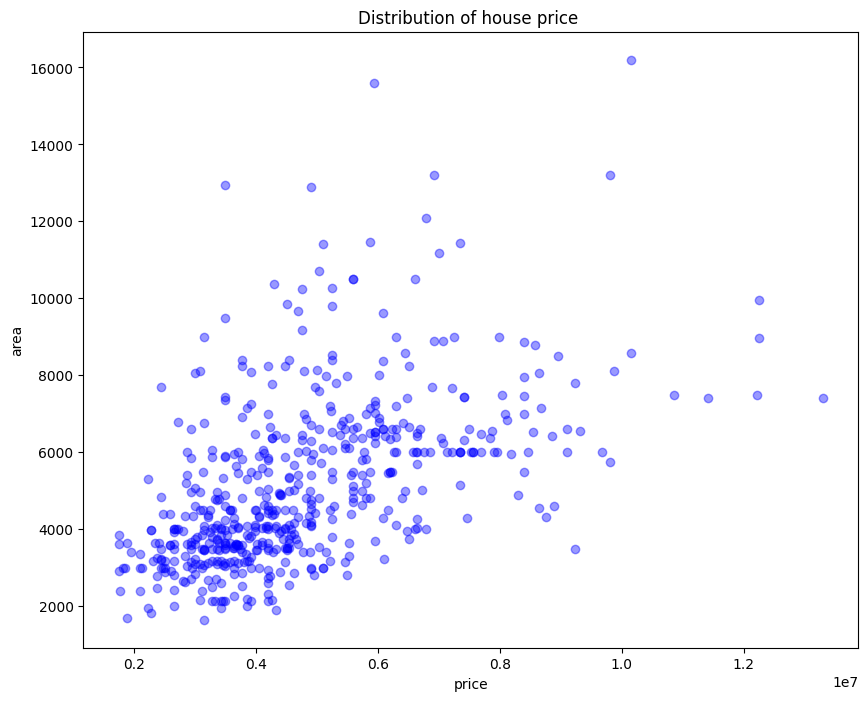

In [18]:
plt.figure(figsize = (10,8))
plt.scatter(data['price'],data['area'], color = 'Blue', alpha = 0.4)
plt.title("Distribution of house price ")
plt.xlabel('price')
plt.ylabel('area')
plt.show()

<Axes: xlabel='price', ylabel='area'>

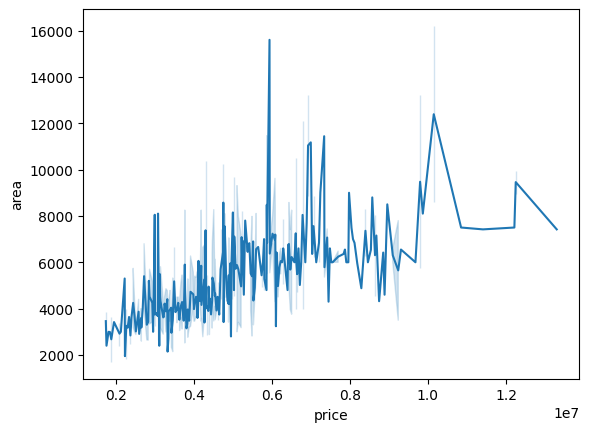

In [19]:
sns.lineplot(x = 'price', y = 'area' , data = data)

<Axes: xlabel='price', ylabel='area'>

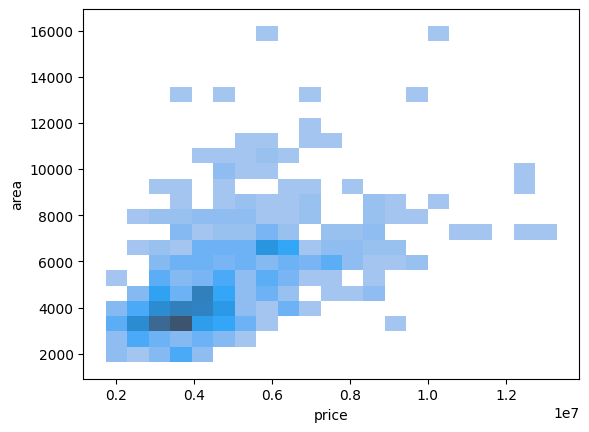

In [20]:
sns.histplot(x = 'price', y = 'area', data = data)

<Axes: ylabel='price'>

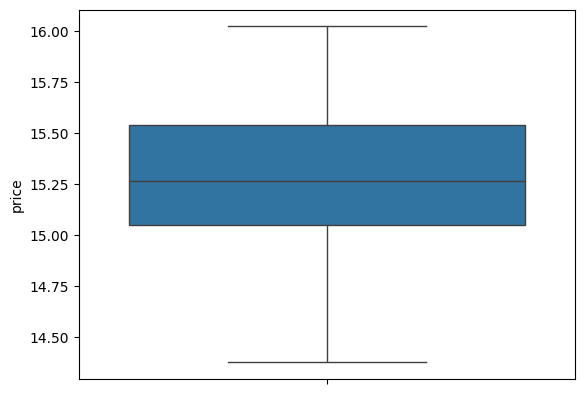

In [58]:
sns.boxplot(data['price'])

In [29]:
# Calculate IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print("Outliers:")
print(outliers)


Outliers:
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   600

In [31]:
data['Z-Score'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Identify outliers
threshold = 3
outliers = data[np.abs(data['Z-Score']) > threshold]
print("Outliers:")
print(outliers)

Outliers:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus   Z-Score  
0              no             yes        2      yes        furnished  4.562174  
1              no             yes        3       no        furnished  4.000809  
2              no              no        2      yes   semi-furnished  4.000809  
3              no             yes        3      yes        furnished  3.982096  
4              no             y

# Removing the Outlier

In [32]:
data['Z-Score'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Remove outliers
threshold = 3
df_no_outliers = data[np.abs(data['Z-Score']) <= threshold]

print("Data without outliers:")
print(df_no_outliers)

Data without outliers:
        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
6    10150000   8580         4          3        4      yes        no   
7    10150000  16200         5          3        2      yes        no   
8     9870000   8100         4          1        2      yes       yes   
9     9800000   5750         3          2        4      yes       yes   
10    9800000  13200         3          1        2      yes        no   
..        ...    ...       ...        ...      ...      ...       ...   
540   1820000   3000         2          1        1      yes        no   
541   1767150   2400         3          1        1       no        no   
542   1750000   3620         2          1        1      yes        no   
543   1750000   2910         3          1        1       no        no   
544   1750000   3850         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
6         no              no      

<Axes: xlabel='price', ylabel='area'>

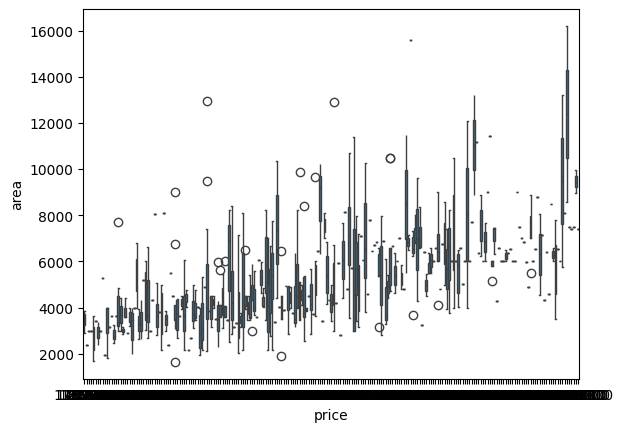

In [34]:
sns.boxplot(x = 'price', y = 'area', data = data)

In [36]:
# Calculate IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print("Data without outliers:")
print(df_no_outliers)


Data without outliers:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheat

In [46]:
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


<Axes: ylabel='price'>

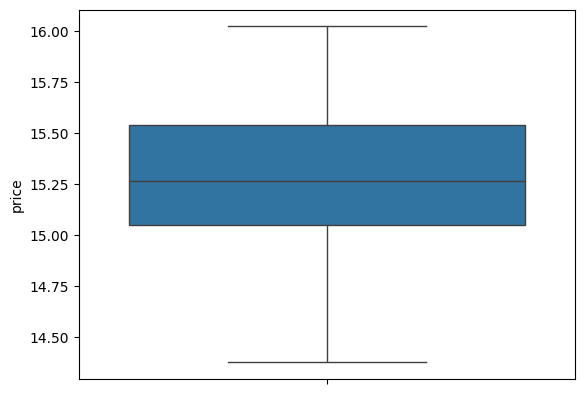

In [57]:
sns.boxplot(data['price'])

In [48]:
data['Z-Score'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Remove outliers
threshold = 3
df_no_outliers = data[np.abs(data['Z-Score']) <= threshold]

print("Data without outliers:")
print(df_no_outliers)

Data without outliers:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheat

C:\Users\asus\AppData\Local\Temp\ipykernel_10020\2819314476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Z-Score'] = (data['price'] - data['price'].mean()) / data['price'].std()


In [51]:
import numpy as np
data['price'] = np.log1p(data['price'])  # log(1 + x) to handle zeros


C:\Users\asus\AppData\Local\Temp\ipykernel_10020\386516691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.log1p(data['price'])  # log(1 + x) to handle zeros


In [55]:
from scipy.stats import zscore

z_scores = zscore(data['price'])
outliers = data[abs(z_scores) > 3]


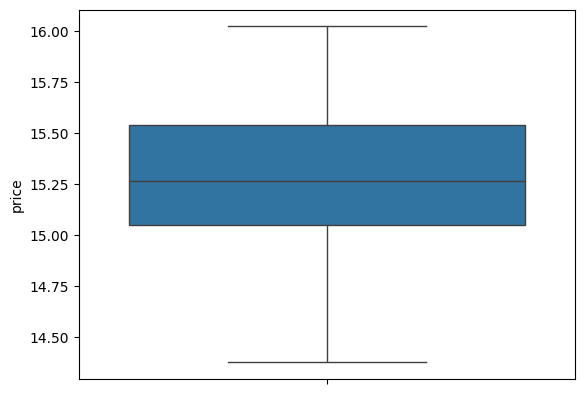

In [53]:
sns.boxplot(data['price'])
plt.show()


# Converting the categorical value to numerical value

In [60]:
df = pd.DataFrame(data = data)

In [61]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z-Score
15,16.023785,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,2.818923
16,16.023785,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,2.818923
17,16.008281,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,2.731210
18,16.000438,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,2.687354
19,15.996493,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,2.665426


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    float64
 1   area              530 non-null    int64  
 2   bedrooms          530 non-null    int64  
 3   bathrooms         530 non-null    int64  
 4   stories           530 non-null    int64  
 5   mainroad          530 non-null    object 
 6   guestroom         530 non-null    object 
 7   basement          530 non-null    object 
 8   hotwaterheating   530 non-null    object 
 9   airconditioning   530 non-null    object 
 10  parking           530 non-null    int64  
 11  prefarea          530 non-null    object 
 12  furnishingstatus  530 non-null    object 
 13  Z-Score           530 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 62.1+ KB


In [63]:
housing_data = pd.DataFrame(data, columns = ['mainroad','guestroom'])

In [71]:
housing_data = pd.get_dummies(data, columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], drop_first = True)
print(housing_data)

         price  area  bedrooms  bathrooms  stories   Z-Score  mainroad_yes  \
15   16.023785  6000         4          1        2  2.818923          True   
16   16.023785  6600         4          2        2  2.818923          True   
17   16.008281  8500         3          2        4  2.731210          True   
18   16.000438  4600         3          2        2  2.687354          True   
19   15.996493  6420         3          2        2  2.665426          True   
..         ...   ...       ...        ...      ...       ...           ...   
540  14.414348  3000         2          1        1 -1.742140          True   
541  14.384879  2400         3          1        1 -1.775252         False   
542  14.375127  3620         2          1        1 -1.785996          True   
543  14.375127  2910         3          1        1 -1.785996         False   
544  14.375127  3850         3          1        2 -1.785996          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  aircondi

In [66]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,Z-Score,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,16.023785,6000,4,1,2,2.818923,True,False,True,False,False,False,True,False,False,True,False
16,16.023785,6600,4,2,2,2.818923,True,True,True,False,True,True,False,False,True,False,True
17,16.008281,8500,3,2,4,2.731210,True,False,False,False,True,False,True,False,False,False,False
18,16.000438,4600,3,2,2,2.687354,True,True,False,False,True,False,True,False,False,False,False
19,15.996493,6420,3,2,2,2.665426,True,False,False,False,True,True,False,False,True,True,False


In [72]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            530 non-null    float64
 1   area                             530 non-null    int64  
 2   bedrooms                         530 non-null    int64  
 3   bathrooms                        530 non-null    int64  
 4   stories                          530 non-null    int64  
 5   Z-Score                          530 non-null    float64
 6   mainroad_yes                     530 non-null    bool   
 7   guestroom_yes                    530 non-null    bool   
 8   basement_yes                     530 non-null    bool   
 9   hotwaterheating_yes              530 non-null    bool   
 10  airconditioning_yes              530 non-null    bool   
 11  parking_1                        530 non-null    bool   
 12  parking_2                 

In [75]:
housing_data['mainroad_yes'] = housing_data['mainroad_yes'].astype(int)

In [76]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            530 non-null    float64
 1   area                             530 non-null    int64  
 2   bedrooms                         530 non-null    int64  
 3   bathrooms                        530 non-null    int64  
 4   stories                          530 non-null    int64  
 5   Z-Score                          530 non-null    float64
 6   mainroad_yes                     530 non-null    int64  
 7   guestroom_yes                    530 non-null    bool   
 8   basement_yes                     530 non-null    bool   
 9   hotwaterheating_yes              530 non-null    bool   
 10  airconditioning_yes              530 non-null    bool   
 11  parking_1                        530 non-null    bool   
 12  parking_2                 

In [79]:
housing_data[housing_data.select_dtypes(include=['bool']).columns] = housing_data.select_dtypes(include=['bool']).astype(int)

In [80]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            530 non-null    float64
 1   area                             530 non-null    int64  
 2   bedrooms                         530 non-null    int64  
 3   bathrooms                        530 non-null    int64  
 4   stories                          530 non-null    int64  
 5   Z-Score                          530 non-null    float64
 6   mainroad_yes                     530 non-null    int64  
 7   guestroom_yes                    530 non-null    int64  
 8   basement_yes                     530 non-null    int64  
 9   hotwaterheating_yes              530 non-null    int64  
 10  airconditioning_yes              530 non-null    int64  
 11  parking_1                        530 non-null    int64  
 12  parking_2                 

In [81]:
housing_data[housing_data.select_dtypes(include=['float']).columns] = housing_data.select_dtypes(include=['float']).astype(int)

In [82]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            530 non-null    int64
 1   area                             530 non-null    int64
 2   bedrooms                         530 non-null    int64
 3   bathrooms                        530 non-null    int64
 4   stories                          530 non-null    int64
 5   Z-Score                          530 non-null    int64
 6   mainroad_yes                     530 non-null    int64
 7   guestroom_yes                    530 non-null    int64
 8   basement_yes                     530 non-null    int64
 9   hotwaterheating_yes              530 non-null    int64
 10  airconditioning_yes              530 non-null    int64
 11  parking_1                        530 non-null    int64
 12  parking_2                        530 non-null    int64

In [83]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,Z-Score,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,16,6000,4,1,2,2,1,0,1,0,0,0,1,0,0,1,0
16,16,6600,4,2,2,2,1,1,1,0,1,1,0,0,1,0,1
17,16,8500,3,2,4,2,1,0,0,0,1,0,1,0,0,0,0
18,16,4600,3,2,2,2,1,1,0,0,1,0,1,0,0,0,0
19,15,6420,3,2,2,2,1,0,0,0,1,1,0,0,1,1,0


In [84]:
correlation_matrix = housing_data.corr()

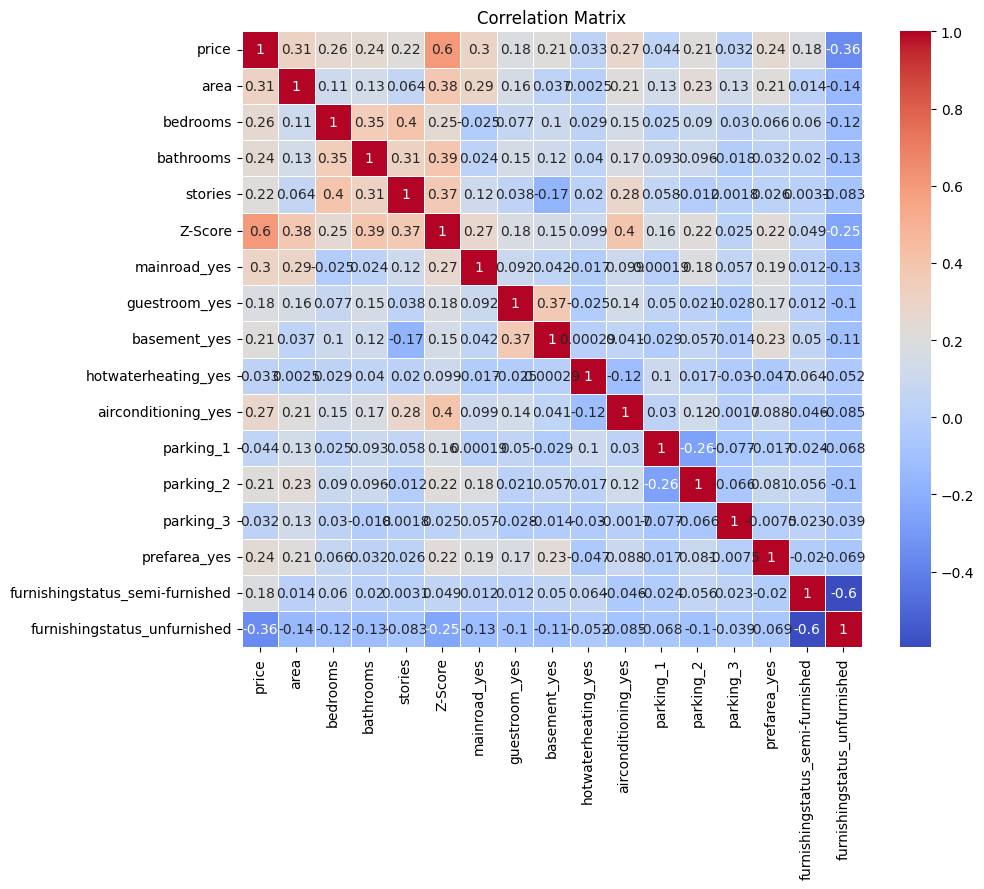

In [87]:
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Handling the correlation_matrix

In [93]:
# Function to remove correlated features
def remove_correlated_features(housing_data, threshold=0.9):
    # Create a set to store features to drop
    features_to_drop = set()
    correlation_matrix = housing_data.corr()

    # Iterate over the correlation matrix and drop highly correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                features_to_drop.add(colname)
    # Drop the correlated features from the DataFrame
    housing_data_cleaned = housing_data.drop(columns=features_to_drop)
    return housing_data_cleaned

# Remove correlated features
housing_data_cleaned = remove_correlated_features(housing_data, threshold=0.9)


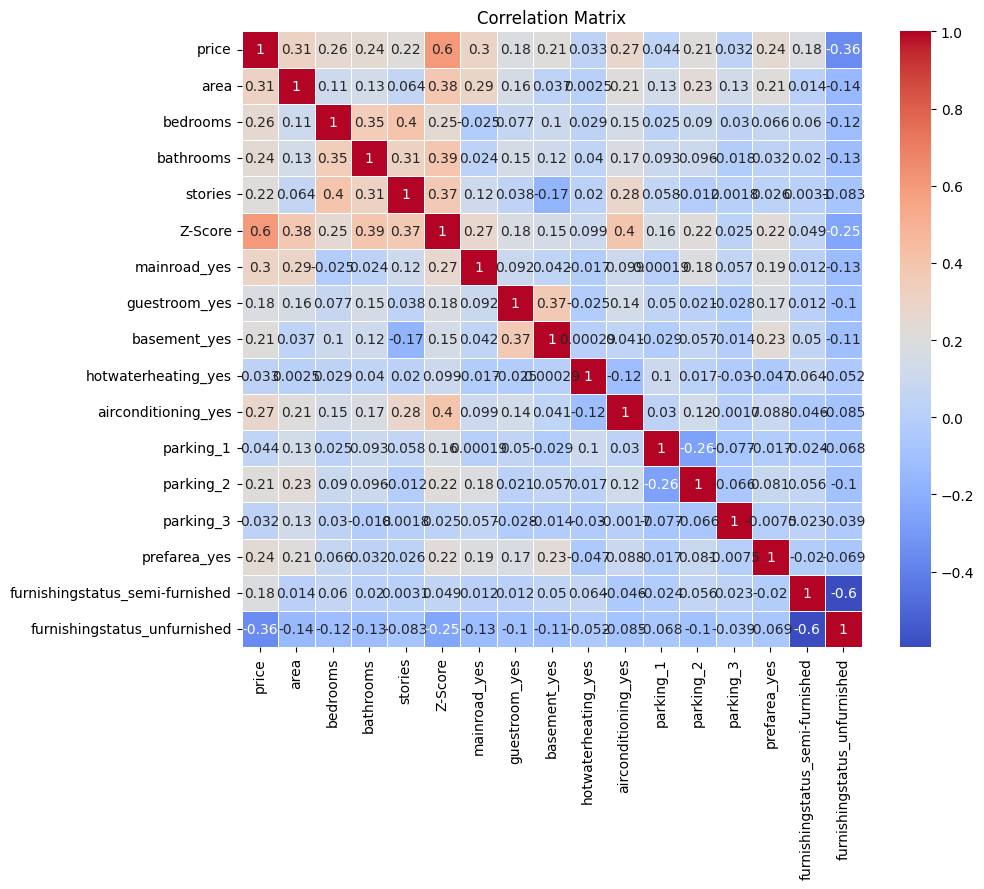

In [94]:
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
# Function to remove correlated features
def remove_correlated_features(housing_data, threshold=0.9):
    # Create a set to store features to drop
    features_to_drop = set()
    correlation_matrix = housing_data.corr()

    # Iterate over the correlation matrix and drop highly correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                features_to_drop.add(colname)
    # Drop the correlated features from the DataFrame
    housing_data_cleaned = housing_data.drop(columns=features_to_drop)
    return housing_data_cleaned

# Remove correlated features
housing_data_cleaned = remove_correlated_features(housing_data, threshold=0.9)


In [96]:
print(housing_data_cleaned)

     price  area  bedrooms  bathrooms  stories  Z-Score  mainroad_yes  \
15      16  6000         4          1        2        2             1   
16      16  6600         4          2        2        2             1   
17      16  8500         3          2        4        2             1   
18      16  4600         3          2        2        2             1   
19      15  6420         3          2        2        2             1   
..     ...   ...       ...        ...      ...      ...           ...   
540     14  3000         2          1        1       -1             1   
541     14  2400         3          1        1       -1             0   
542     14  3620         2          1        1       -1             1   
543     14  2910         3          1        1       -1             0   
544     14  3850         3          1        2       -1             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
15               0             1             

In [97]:
# Function to remove correlated features
def remove_correlated_features(housing_data, threshold=0.9):
    # Create a set to store features to drop
    features_to_drop = set()
    correlation_matrix = housing_data.corr()

    # Iterate over the correlation matrix and drop highly correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                features_to_drop.add(colname)
    # Drop the correlated features from the DataFrame
    housing_data_cleaned = housing_data.drop(columns=features_to_drop)
    return housing_data_cleaned

# Remove correlated features
housing_data_cleaned = remove_correlated_features(housing_data, threshold=0.4)


In [98]:
print(housing_data_cleaned)

     price  area  bedrooms  bathrooms  mainroad_yes  guestroom_yes  \
15      16  6000         4          1             1              0   
16      16  6600         4          2             1              1   
17      16  8500         3          2             1              0   
18      16  4600         3          2             1              1   
19      15  6420         3          2             1              0   
..     ...   ...       ...        ...           ...            ...   
540     14  3000         2          1             1              0   
541     14  2400         3          1             0              0   
542     14  3620         2          1             1              0   
543     14  2910         3          1             0              0   
544     14  3850         3          1             1              0   

     basement_yes  hotwaterheating_yes  airconditioning_yes  parking_1  \
15              1                    0                    0          0   
16         

In [103]:
# Function to remove correlated features
def remove_correlated_features(housing_data, threshold=0.9):
    # Create a set to store features to drop
    features_to_drop = set()
    correlation_matrix = housing_data.corr()

    # Iterate over the correlation matrix and drop highly correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                features_to_drop.add(colname)
    # Drop the correlated features from the DataFrame
    housing_data_cleaned = housing_data.drop(columns=features_to_drop)
    return housing_data_cleaned

# Remove correlated features
housing_data_cleaned = remove_correlated_features(housing_data, threshold=0.2)


In [104]:
print(housing_data_cleaned)

     price  guestroom_yes  hotwaterheating_yes  parking_1  parking_3  \
15      16              0                    0          0          0   
16      16              1                    0          1          0   
17      16              0                    0          0          0   
18      16              1                    0          0          0   
19      15              0                    0          1          0   
..     ...            ...                  ...        ...        ...   
540     14              0                    0          0          0   
541     14              0                    0          0          0   
542     14              0                    0          0          0   
543     14              0                    0          0          0   
544     14              0                    0          0          0   

     furnishingstatus_semi-furnished  
15                                 1  
16                                 0  
17                

# Feature Engineering

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load dataset
X = housing_data.drop('price', axis=1)
y = housing_data['area']

# Initialize the model
model = LogisticRegression()

# Initialize RFE with the model and the number of features to select
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Selected features: Index(['bedrooms', 'stories', 'Z-Score', 'prefarea_yes',
       'furnishingstatus_semi-furnished'],
      dtype='object')


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Polynomial of degree 2
X_poly = poly.fit_transform(housing_data)

# Display the new features
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())
print(poly_df)


       1  price    area  bedrooms  bathrooms  stories  Z-Score  mainroad_yes  \
0    1.0   16.0  6000.0       4.0        1.0      2.0      2.0           1.0   
1    1.0   16.0  6600.0       4.0        2.0      2.0      2.0           1.0   
2    1.0   16.0  8500.0       3.0        2.0      4.0      2.0           1.0   
3    1.0   16.0  4600.0       3.0        2.0      2.0      2.0           1.0   
4    1.0   15.0  6420.0       3.0        2.0      2.0      2.0           1.0   
..   ...    ...     ...       ...        ...      ...      ...           ...   
525  1.0   14.0  3000.0       2.0        1.0      1.0     -1.0           1.0   
526  1.0   14.0  2400.0       3.0        1.0      1.0     -1.0           0.0   
527  1.0   14.0  3620.0       2.0        1.0      1.0     -1.0           1.0   
528  1.0   14.0  2910.0       3.0        1.0      1.0     -1.0           0.0   
529  1.0   14.0  3850.0       3.0        1.0      2.0     -1.0           1.0   

     guestroom_yes  basement_yes  ...  

# Model Training

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

In [140]:
X = housing_data.drop(['price'], axis=1)  # Features excluding 'price'
y = housing_data['price']  # Target variable, which is 'price'


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [151]:

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.09854658548812797
R^2 Score: 0.5370947179997467


In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Optional: Cross-validation for a more reliable estimate of accuracy
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Accuracy: 0.8774
Confusion Matrix:
[[22  4  0]
 [ 6 71  1]
 [ 0  2  0]]
Classification Report:
              precision    recall  f1-score   support

          14       0.79      0.85      0.81        26
          15       0.92      0.91      0.92        78
          16       0.00      0.00      0.00         2

    accuracy                           0.88       106
   macro avg       0.57      0.59      0.58       106
weighted avg       0.87      0.88      0.87       106

Cross-validated Accuracy: 0.8632 ± 0.0140


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [153]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [154]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [159]:
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.54
Mean Squared Error: 0.0985


In [160]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model training with a Random Forest Regressor (example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Hyperparameter tuning with GridSearchCV (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


R² Score: 0.6371
Mean Squared Error: 0.0773
Best Model R² Score: 0.7083
Best Model Mean Squared Error: 0.0621


In [161]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)


In [162]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [163]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model training with a Random Forest Regressor (example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Hyperparameter tuning with GridSearchCV (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


R² Score: 0.6371
Mean Squared Error: 0.0773
Best Model R² Score: 0.7218
Best Model Mean Squared Error: 0.0592


In [164]:
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


Best Model R² Score: 0.7218
Best Model Mean Squared Error: 0.0592


In [165]:
from scipy.stats import zscore
import numpy as np

# Calculate z-scores and filter out outliers
z_scores = zscore(X)
X_filtered = X[(np.abs(z_scores) < 3).all(axis=1)]  # Keep data points within 3 standard deviations


In [167]:
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


Best Model R² Score: 0.7218
Best Model Mean Squared Error: 0.0592


In [168]:
feature_importances = clf.feature_importances_
important_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0.1]
print(important_features)


['area', 'Z-Score']


In [169]:
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


Best Model R² Score: 0.7218
Best Model Mean Squared Error: 0.0592


In [170]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


In [171]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [173]:
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Random Forest": rf,
    "XGBoost": model,
    "SVR": svr,
    "KNN": knn,
   
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - R²: {r2:.4f}, MSE: {mse:.4f}")


Random Forest - R²: 0.6371, MSE: 0.0773
XGBoost - R²: 0.6371, MSE: 0.0773
SVR - R²: -0.0754, MSE: 0.2289
KNN - R²: 0.1084, MSE: 0.1898


In [174]:
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model R² Score: {r2_best:.4f}")
print(f"Best Model Mean Squared Error: {mse_best:.4f}")


Best Model R² Score: 0.7218
Best Model Mean Squared Error: 0.0592
